<a href="https://colab.research.google.com/github/Sauju123/ML-Assignment/blob/main/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4. Create a dataset for object detection with 5 classes, each having 10 samples, organized into folders. Write a Python script using OpenCV to read images from a specified directory and use Matplotlib to display images from each class with the class name as the title.

In [ ]:
!unzip /content/Dataset.zip

Archive:  /content/Dataset.zip
   creating: Dataset/Bird/
  inflating: Dataset/Bird/1.png      
  inflating: Dataset/Bird/10.png     
  inflating: Dataset/Bird/2.png      
  inflating: Dataset/Bird/3.png      
  inflating: Dataset/Bird/4.png      
  inflating: Dataset/Bird/5.png      
  inflating: Dataset/Bird/6.png      
  inflating: Dataset/Bird/7.png      
  inflating: Dataset/Bird/8.png      
  inflating: Dataset/Bird/9.png      
   creating: Dataset/College/
  inflating: Dataset/College/1.png   
  inflating: Dataset/College/10.png  
  inflating: Dataset/College/2.png   
  inflating: Dataset/College/3.png   
  inflating: Dataset/College/4.png   
  inflating: Dataset/College/5.png   
  inflating: Dataset/College/6.png   
  inflating: Dataset/College/7.png   
  inflating: Dataset/College/8.png   
  inflating: Dataset/College/9.png   
   creating: Dataset/Dog/
  inflating: Dataset/Dog/1.png       
  inflating: Dataset/Dog/10.png      
  inflating: Dataset/Dog/2.png       
  inflating:

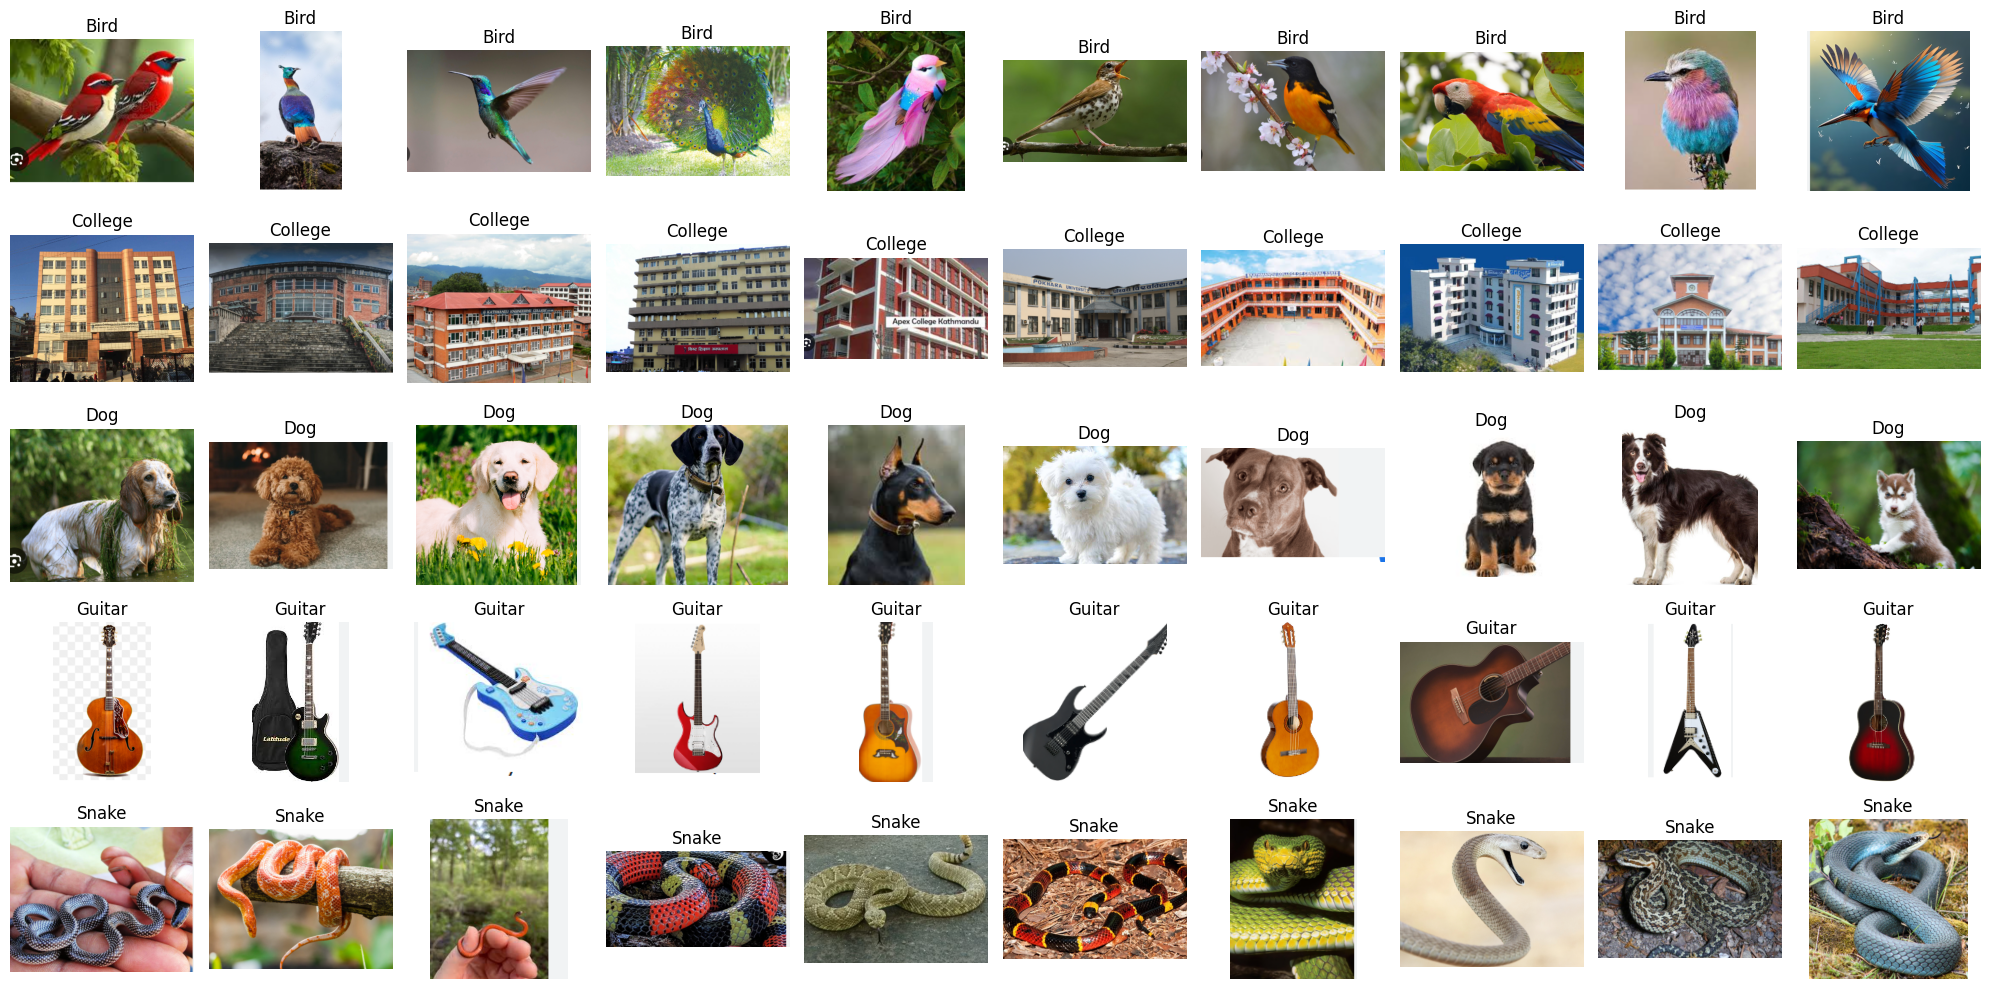

In [10]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the dataset path
Dataset = "/content/Dataset"

# Function to read and display images
def display_images(dataset):
    # Get class names from subdirectories
    class_names = sorted(os.listdir(Dataset))

    # Create a figure to display images
    fig, axs = plt.subplots(nrows=len(class_names), ncols=10, figsize=(20, 10))

    # Iterate through each class
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(Dataset, class_name)
        image_files = os.listdir(class_path)[:10]  # Select first 10 images

        # Iterate through each image in the class
        for j, image_file in enumerate(image_files):
            image_path = os.path.join(class_path, image_file)

            # Read the image using OpenCV
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

            # Display the image
            axs[i, j].imshow(image)
            axs[i, j].set_title(class_name)
            axs[i, j].axis('off')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Call the function to display images
display_images(Dataset)

5. Implement the linear regression algorithm from scratch and train it for the following snowfall data.

In [16]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.coefficients = None  # To store the coefficients (theta)

    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        X = np.c_[np.ones(X.shape[0]), X]

        # Calculate coefficients using closed-form solution (normal equation)
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        # Add a column of ones to X for the intercept term
        X = np.c_[np.ones(X.shape[0]), X]

        # Predict y values
        y_pred = X @ self.coefficients
        return y_pred

# Given data
years = np.array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
snowfall = np.array([45.2, 42.5, 40.1, 38.6, 36.9, 35.2, 33.8, 32.5, 30.9, 29.6, 28.2, 26.8, 25.5, 24.3, 22.9])

# Reshape years to a column vector
years = years.reshape(-1, 1)

# Initialize and train the model
model = LinearRegression()
model.fit(years, snowfall)

# Predict for the year 2024
year_2024 = np.array([2024]).reshape(-1, 1)
snowfall_2024_pred = model.predict(year_2024)
print(f"Predicted snowfall for 2024 (from scratch): {snowfall_2024_pred[0]:.2f} inches")

Predicted snowfall for 2024 (from scratch): 20.70 inches


In [17]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

# Initialize and train the scikit-learn LinearRegression model
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(years, snowfall)

# Predict for the year 2024 using scikit-learn model
snowfall_2024_pred_sklearn = sklearn_model.predict([[2024]])
print(f"Predicted snowfall for 2024 (scikit-learn): {snowfall_2024_pred_sklearn[0]:.2f} inches")

Predicted snowfall for 2024 (scikit-learn): 20.70 inches


6. Implement the SVM classification algorithm from scratch.

In [18]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

class SVM:
    def __init__(self, C=1.0, kernel='linear', degree=3, gamma='scale'):
        self.C = C
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
        self.alpha = None
        self.b = 0
        self.X = None
        self.y = None

    def _kernel(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2.T)
        elif self.kernel == 'poly':
            return (1 + np.dot(x1, x2.T))**self.degree
        elif self.kernel == 'rbf':
            if self.gamma == 'scale':
                gamma = 1 / (x1.shape[1] * np.var(self.X))
            else:
                gamma = self.gamma
            return np.exp(-gamma * np.sum((x1[:, None] - self.X) ** 2, axis=-1))

    def fit(self, X, y):
        self.X = X
        self.y = y
        n = X.shape[0]
        P = np.outer(y, y) * self._kernel(X, X)
        Q = np.eye(n) - P
        self.alpha = np.zeros(n)
        self.b = 0

        for _ in range(100):
            for i in range(n):
                g = np.sum(self.alpha * y * self._kernel(X, X[i])) + self.b
                if y[i] * g < 1:
                    self.alpha[i] = self.C
                else:
                    self.alpha[i] = 0

        self.b = np.mean([y_i - np.sum(self.alpha * y * self._kernel(X, X[i])) for i, y_i in enumerate(y)])

    def predict(self, X):
        return np.sign(np.sum(self.alpha * self.y * self._kernel(self.X, X.T), axis=0) + self.b)

In [19]:
# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM model
svm = SVM(C=1.0, kernel='rbf')
svm.fit(X_train, y_train)

# Predict on test set
predictions = svm.predict(X_test)

In [20]:
predictions

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.])